### <span style='color:tomato;'>การแปลงภาพเชิงพื้นที่</span>

**<span style='color:lightblue;'>การแปลงภาพเชิงพื้นที่</span>** เป็นกระบวนการที่เกี่ยวข้องกับการจัดการภาพเพื่อเปลี่ยนการกำหนดค่าเชิงพื้นที่ของภาพ ซึ่งอาจรวมถึงการดำเนินการต่างๆ เช่น การหมุน การปรับขนาด (ปรับเปลี่ยนขนาด) การแปล (การเลื่อน) และการเฉือน การแปลงเหล่านี้สามารถนำไปใช้เพื่อจุดประสงค์ต่างๆ เช่น การแก้ไขการวางแนวของภาพ การจัดตำแหน่งภาพในชุดข้อมูล หรือเตรียมภาพสำหรับการวิเคราะห์หรือการแสดงผลเพิ่มเติม สาระสำคัญของการแปลงเชิงพื้นที่คือการแมปตำแหน่งของพิกเซลในภาพอินพุตไปยังตำแหน่งใหม่ในภาพเอาต์พุต ตามกฎการแปลงที่ระบุไว้

การแปลงเชิงพื้นที่มักจะอธิบายโดยใช้แบบจำลองทางคณิตศาสตร์ แบบจำลองทั่วไปคือการแปลงแอฟฟีน ซึ่งรองรับการแปล การหมุน การปรับขนาด และการเฉือน และสามารถแสดงด้วยเมทริกซ์ได้ การแปลงที่ซับซ้อนมากขึ้น เช่น การแปลงมุมมองหรือการบิดเบือนแบบไม่เชิงเส้น จำเป็นต้องใช้แบบจำลองที่ซับซ้อนมากขึ้น

การแปลงเหล่านี้มีความสำคัญมากในหลายด้านของการมองเห็นด้วยคอมพิวเตอร์ การประมวลผลภาพ และกราฟิกส์ เนื่องจากการแปลงเหล่านี้อนุญาตให้จัดการเชิงเรขาคณิตของภาพเพื่อให้บรรลุผลลัพธ์ที่ต้องการหรือเพื่อจำลองมุมมองหรือเอฟเฟกต์เฉพาะ ตัวอย่างเช่น ในการมองเห็นด้วยคอมพิวเตอร์ การแปลงเชิงพื้นที่ใช้เพื่อจำลองการเปลี่ยนแปลงจุดมองของกล้อง ในขณะที่ในกราฟิกส์ อาจใช้เพื่อสร้างภาพเคลื่อนไหวหรือปรับภาพให้พอดีกับหน้าจอของขนาดต่างๆ


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

### การสร้างภาพ


In [2]:
# ฟังก์ชันสร้างภาพสุ่มและเมทริกซ์พิกัด
def generate_image(rows, cols):
    img = np.random.randint(0, 256, size=(rows, cols))  # สร้างพิกเซลสุ่ม 0-255
    y, x = np.mgrid[0:rows, 0:cols]  # สร้างเมทริกซ์พิกัด
    return img, y, x

In [3]:
# ฟังก์ชันหาจุดศูนย์กลางของภาพ (Grayscale)
def centroid_image(img):
    r, c = img.shape  # r=แถว, c=คอลัมน์
    return (int(r/2), int(c/2))  # คืนค่าพิกัด (แถวกลาง, คอลัมน์กลาง)

In [4]:
# ฟังก์ชันแสดงภาพ (Grayscale)
def ShowImage(img):
    plt.axis("off")  # ซ่อนแกน
    plt.imshow(img, cmap='gray')  # แสดงภาพเป็นสีเทา
    plt.show()

### การแปลงทางเรขาคณิต 2D


#### <span style='color:tomato;'>การแปลภาพ 2D</span>

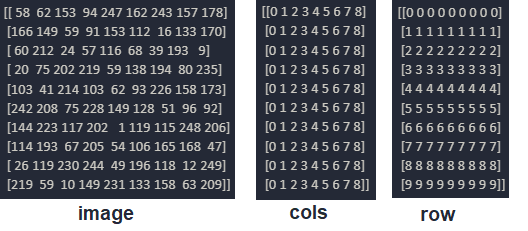


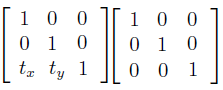      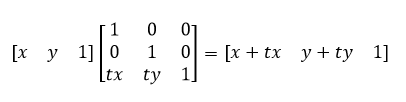   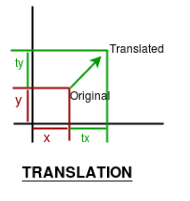

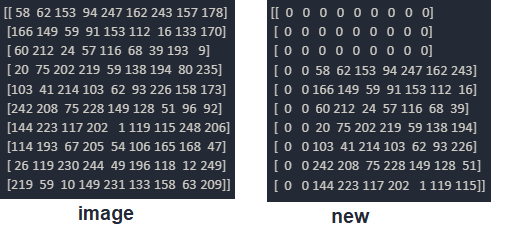

#### <span style='color:tomato;'>ฟังก์ชันการแปลภาพ</span>


In [ ]:
# ฟังก์ชันแปลภาพ (Translation) สำหรับภาพ Grayscale
# tx, ty = ระยะการแปล
def img_translation(img, tx, ty):
    out = np.zeros_like(img, dtype='uint8')  # สร้างภาพเอาต์พุตขนาดเดียวกันเก็บค.หนาแน่นของภาพ
    Ts = np.identity(3, dtype=float)  # สร้างเมทริกซ์เอกลักษณ์ 3x3
    Ts[2, 0] = tx  # กำหนดค่า tx ที่ตำแหน่ง row,col (2, 0) ของเมทริกซ์ ก็คือตรงมุมล่างซ้าย  
    Ts[2, 1] = ty  # กำหนดค่า ty
    rows, cols = img.shape
    
    # วนลูปผ่านพิกเซลแต่ละตัวในภาพอินพุต
    for y in range(rows):
        for x in range(cols):
            xy = np.array([x, y, 1], dtype=float)  # พิกัดเดิม (x, y, 1)
            new_xy = np.matmul(xy, Ts)  # คูณเมทริกซ์เพื่อได้พิกัดใหม่ ได้ผลลัพท์ออกมาเป็น (x', y', 1)
            xn = int(new_xy[0]) # x' = new_xy[0]
            yn = int(new_xy[1]) # y' = new_xy[1]
            # ตรวจสอบว่าพิกัดใหม่อยู่ในขอบเขตของภาพ
            if 0 <= xn < cols and 0 <= yn < rows:
                out[yn, xn] = img[y, x]  # คัดลอกพิกเซลไปยังตำแหน่งใหม่
    return out.astype(np.uint8)

### <span style='color:tomato;'>การใช้งานการแปลภาพ</span>


#### <span style='color:orange;'>ภาพที่สร้างขึ้น</span>

ถ้าไม่หา centroid:
- หมุนภาพ 45° → ภาพหมุนรอบมุมบนซ้าย → ภาพไปนอกขอบ ❌

ถ้าหา centroid:
- หมุนภาพ 45° → ภาพหมุนกลับตัวเอง (เหมือนหมุนรอบตัวเอง) → อยู่ในขอบ ✅

>หาพิกัดจุดศูนย์กลางเพื่อให้การแปลงรอบตัวภาพ ไม่ให้ภาพหลุดออกไปนอกกรอบ 


In [ ]:
# สร้างภาพสุ่มและหาจุดศูนย์กลาง
height, width = 12, 10
img, y, x = generate_image(height, width)  # สร้างภาพสุ่ม y, x = เมทริกซ์พิกัด
img = img.astype(np.uint8)
cen = centroid_image(img)  # หาพิกัดจุดศูนย์กลาง 
print(cen[0], cen[1])

6 5


In [7]:
# แปลภาพให้จุดศูนย์กลางมาที่มุมบนซ้าย
# res = img_translation(img, 2, 3)  # แปล 2 ขวา 3 ลง
res = img_translation(img, cen[1], cen[0])
print(img)
print(res)

[[106 129   8 116 168 216 131 233  94 189]
 [ 13 179 130 118 139  90  10 193   5 215]
 [252 127 254 157  11 160  11  73  20 104]
 [160 181  28 240 200  18 130 135  76 132]
 [229 226  86 240 223  73 108 178  54 244]
 [ 64 116  36  71 180  41  37  86   1  51]
 [ 65   0  10  23 191 134   5 165 199 121]
 [ 72 205 247   7 174  52  60  52 180 101]
 [192  23  85 154 124 191  45 110 183 165]
 [161  63 226 121  73 226  56  50  50 161]
 [ 21  66  40 181 173  43  77  99  49  33]
 [ 11 162 138 164 209  27 189  10 233  59]]
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 106 129   8 116 168]
 [  0   0   0   0   0  13 179 130 118 139]
 [  0   0   0   0   0 252 127 254 157  11]
 [  0   0   0   0   0 160 181  28 240 200]
 [  0   0   0   0   0 229 226  86 240 223]
 [  0   0 

#### <span style='color:orange;'>ภาพดิจิทัล</span>


In [32]:
# อ่านภาพดิจิทัลเป็นสีเทา
img = cv2.imread("./img/cameraman.png", 0)  # 0 = โหลดเป็นสีเทา
cen = centroid_image(img)  # หาจุดศูนย์กลาง
print(img.shape)
print(cen)

(512, 512)
(256, 256)


In [ ]:
# แปลภาพให้จุดศูนย์กลางไปยังมุมบนซ้าย
res = img_translation(img, -cen[1], -cen[0])# ค่าติดลบ = เลื่อนซ้าย 256, บน 256
print(res)

[[19  7 13 ...  0  0  0]
 [17  8 13 ...  0  0  0]
 [16  8 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


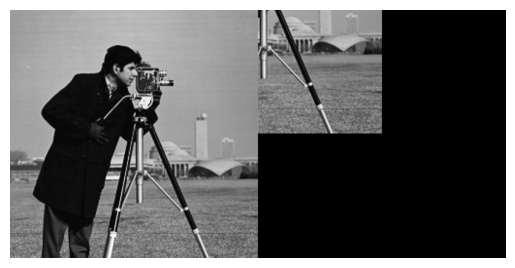

In [10]:
# รวมภาพเดิมและภาพแปลแล้ว แล้วแสดง
mul_img = cv2.hconcat([img, res])  # ต่อภาพแนวนอน
ShowImage(mul_img)

#### <span style='color:tomato;'>การปรับขนาดภาพ 2D</span>


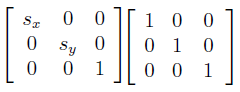   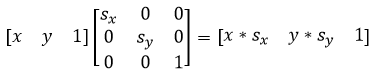    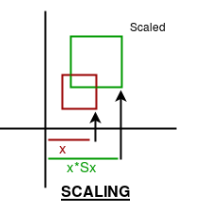

In [ ]:
# ฟังก์ชันปรับขนาดภาพ (Scaling)
# sx, sy = ตัวคูณการปรับขนาด
def img_scaling(img, sx, sy):
    out = np.zeros_like(img, dtype='uint8')  # สร้างภาพเอาต์พุตขนาดเดียวกัน
    S = np.identity(3, dtype=float)  # เมทริกซ์การปรับขนาด
    S[0, 0] = sx  # ตัวคูณสำหรับแกน x ตำแหน่ง row,col (0, 0)
    S[1, 1] = sy  # ตัวคูณสำหรับแกน y
    rows, cols = img.shape
    
    # วนลูปผ่านพิกเซลแต่ละตัว
    for y in range(rows):
        for x in range(cols):
            xy = np.array([x, y, 1], dtype=float)
            new_xy = np.matmul(xy, S)  # คูณเมทริกซ์เพื่อปรับขนาด
            xn = int(new_xy[0])
            yn = int(new_xy[1])
            # ตรวจสอบขอบเขต
            if 0 <= xn < cols and 0 <= yn < rows:
                out[yn, xn] = img[y, x]
    return out.astype(np.uint8)

### <span style='color:tomato;'>การใช้งานการปรับขนาดภาพ</span>


In [12]:
# ปรับขนาดภาพให้ใหญ่ขึ้น 1.15 เท่า
res = img_scaling(img, 1.15, 1.15)

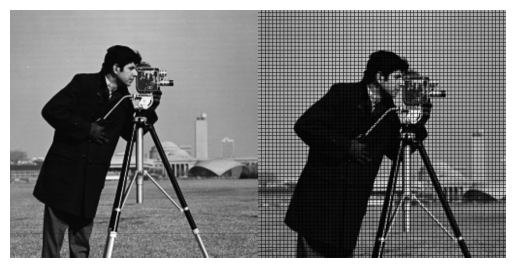

In [13]:
# แสดงผลเปรียบเทียบภาพเดิมกับภาพที่ปรับขนาดแล้ว
mul_img = cv2.hconcat([img, res])
ShowImage(mul_img)

### เหตุผลที่ `img_scaling` มีช่องดำๆ
ปัญหานี้เกิดจาก วิธีการ Forward Mapping ที่ใช้ในฟังก์ชัน `img_scaling`:

**ปัญหา**
- Forward Mapping: วนลูปพิกเซลเดิม และแมปไปยังตำแหน่งใหม่
- เมื่อ sx, sy < 1 (ย่อภาพ): พิกเซลบางตำแหน่งในภาพเอาต์พุตจะไม่ได้รับค่า → ปรากฏเป็น 0 (ดำ)
- เมื่อ sx, sy > 1 (ขยายภาพ): ช่องว่างเกิดขึ้นเพราะมี "หลุม" ระหว่างพิกเซล

In [35]:
# ปรับขนาดภาพให้เล็กลง 0.5 เท่า
res2 = img_scaling(img, 0.5, 0.5)

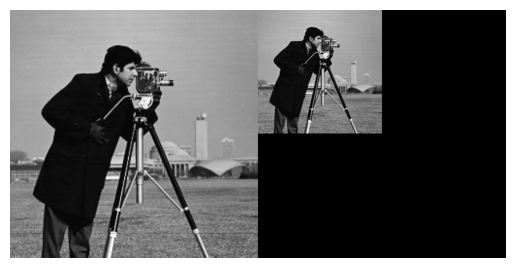

In [36]:
# แสดงผลเปรียบเทียบภาพเดิมกับภาพที่ปรับขนาดแล้ว
mul_img2 = cv2.hconcat([img, res2])
ShowImage(mul_img2)

### <span style='color:tomato;'>การประกอบเมทริกซ์การแปลง</span>
#### <span style='color:orange;'>สร้างเมทริกซ์การแปลง</span>


In [14]:
# สร้างเมทริกซ์การแปลงเริ่มต้น (เมทริกซ์เอกลักษณ์)
def init_Transformation():
    return np.identity(3, dtype=float)

In [15]:
# คูณเมทริกซ์แปลกับเมทริกซ์การแปลงเดิม
def matrix_Translate(T, tx, ty):
    Ts = np.identity(3, dtype=float)
    Ts[2, 0] = tx  # ค่าแปล x
    Ts[2, 1] = ty  # ค่าแปล y
    return np.matmul(Ts, T)  # คูณเมทริกซ์

In [16]:
# คูณเมทริกซ์ปรับขนาดกับเมทริกซ์การแปลงเดิม
def matrix_Scale(T, sx, sy):
    S = np.identity(3, dtype=float)
    S[0, 0] = sx  # ตัวคูณ x
    S[1, 1] = sy  # ตัวคูณ y
    return np.matmul(S, T)  # คูณเมทริกซ์

In [17]:
# ใช้เมทริกซ์การแปลงกับภาพ
def img_transform(img, T):
    out = np.zeros_like(img, dtype='uint8')
    rows, cols = img.shape
    
    # วนลูปผ่านพิกเซลแต่ละตัว
    for y in range(rows):
        for x in range(cols):
            xy = np.array([x, y, 1], dtype=float)
            new_xy = np.matmul(xy, T)  # ใช้เมทริกซ์มาแปลงพิกัด
            xn = int(new_xy[0])
            yn = int(new_xy[1])
            # ตรวจสอบขอบเขต
            if 0 <= xn < cols and 0 <= yn < rows:
                out[yn, xn] = img[y, x]
    return out.astype(np.uint8)

#### <span style='color:lightgreen;'>การใช้งานการแปลงเมทริกซ์</span>
**<span style='color:lightblue;'>ตัวอย่างง่าย</span>**


In [18]:
# ตัวอย่างง่าย: แปลภาพ 50 พิกเซลไปขวาและลง
img = cv2.imread("./img/cameraman.png", 0)  # อ่านภาพเป็นสีเทา
T = init_Transformation()  # เริ่มต้นเมทริกซ์
T = matrix_Translate(T, 50, 50)  # เพิ่มการแปล
out_ts = img_transform(img, T)  # ใช้เมทริกซ์แปลงภาพ

In [19]:
# ตัวอย่างการปรับขนาด - ลดขนาดเหลือ 80%
T = init_Transformation()
T = matrix_Scale(T, 0.8, 0.8)  # ปรับขนาด 80%
out_scale = img_transform(img, T)

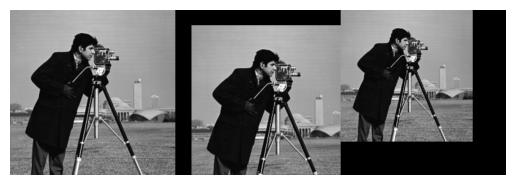

In [20]:
# แสดงผลเปรียบเทียบภาพเดิม แปลแล้ว และปรับขนาดแล้ว
mul_img = cv2.hconcat([img, out_ts, out_scale])
ShowImage(mul_img)

**<span style='color:lightblue;'>ตัวอย่างขั้นสูง</span>**

เป็นการรวมการแปลงหลายๆ อย่างเข้าด้วยกัน เช่น การแปลเพื่อย้ายจุดศูนย์กลางไปที่มุมบนซ้าย → การหมุน → การแปลกลับเพื่อคืนจุดศูนย์กลางเดิม ทำให้ภาพหมุนรอบตัวเองและไม่หลุดออกนอกขอบเขตของภาพ มีการซ้อนกันของเมทริกซ์ 4 ชั้้น

In [ ]:
# ตัวอย่างขั้นสูง: แปลไปศูนย์กลาง → ปรับขนาด → แปลกลับ
img = cv2.imread("./img/cameraman.png", 0)
cen = centroid_image(img)
print(cen)
T = init_Transformation()
T = matrix_Translate(T, cen[1], cen[0])  # ขยับไปศูนย์กลาง
T = matrix_Scale(T, 0.5, 0.5)  # ปรับขนาด 50%
T = matrix_Translate(T, -cen[1], -cen[0])  # ขยับกลับสู่ตำแหน่งเดิม
out = img_transform(img, T)

(256, 256)


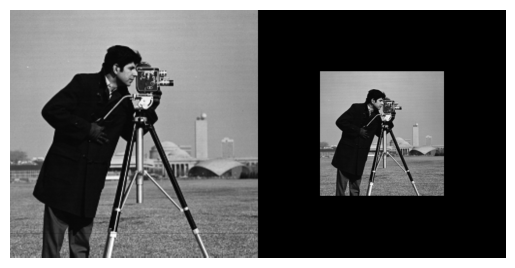

In [22]:
# แสดงผลเปรียบเทียบภาพเดิมกับภาพที่ปรับขนาด
mul_img = cv2.hconcat([img, out])
ShowImage(mul_img)

#### <span style='color:tomato;'>การหมุนภาพ 2D</span>


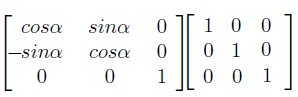     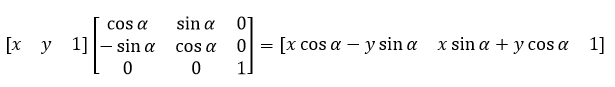     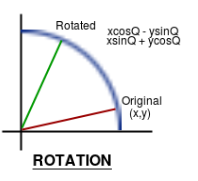

In [23]:
# ฟังก์ชันการแปลงการหมุนเมทริกซ์
# theta = มุมการหมุน (หน่วยองศา)
def matrix_Rotatef(T, theta):
    R = np.identity(3, dtype=float)
    ang = (theta * np.pi) / 180  # แปลงจากองศาเป็นเรเดียน
    R[0, 0] = math.cos(ang)  # cos(theta)
    R[0, 1] = math.sin(ang)  # sin(theta)
    R[1, 0] = -math.sin(ang)  # -sin(theta)
    R[1, 1] = math.cos(ang)  # cos(theta)
    return np.matmul(R, T)

In [24]:
# อ่านภาพและหาจุดศูนย์กลาง
img = cv2.imread("./img/cameraman.png", 0)
cen = centroid_image(img)

#### <span style='color:tomato;'>การใช้งานการหมุนภาพ</span>
**<span style='color:tomato;'>ตัวอย่างง่าย</span>**


In [41]:
# หมุนภาพ -45 องศา
T = init_Transformation()
T = matrix_Rotatef(T, -45)  # หมุน -45 องศา ไปทางขวา + ไปทางซ้าย
out = img_transform(img, T)

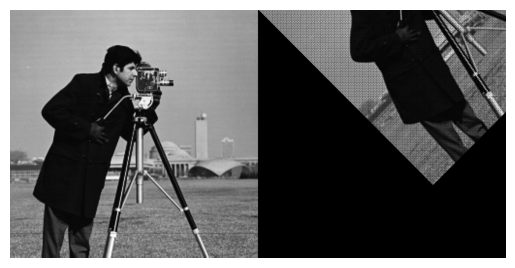

In [42]:
# แสดงผลเปรียบเทียบภาพเดิมกับภาพที่หมุนแล้ว
mul_img = cv2.hconcat([img, out])
ShowImage(mul_img)

**<span style='color:tomato;'>ตัวอย่างขั้นสูง 1</span>**


In [ ]:
# ตัวอย่างขั้นสูง 1: แปลไปศูนย์กลาง → หมุน → แปลกลับ
T = init_Transformation()
T = matrix_Translate(T, -cen[1], -cen[0])  # แปลไปศูนย์กลาง (ลบ) ติดลบ 1:col 0:row = เลื่อนซ้าย 256, บน 256
print(-cen[1], -cen[0])
T = matrix_Rotatef(T, -45)  # หมุน -45 องศา
T = matrix_Translate(T, cen[1], cen[0])  # แปลกลับสู่ตำแหน่งเดิม บวก = เลื่อนขวา 256, ล่าง 256
out = img_transform(img, T)

-256 -256


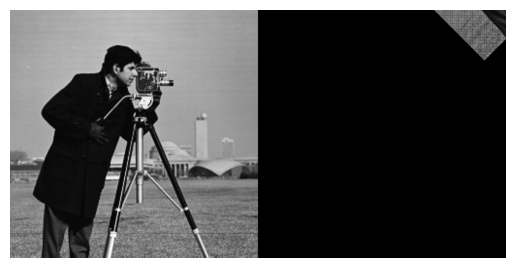

In [44]:
# แสดงผลเปรียบเทียบ
mul_img = cv2.hconcat([img, out])
ShowImage(mul_img)

**<span style='color:tomato;'>ตัวอย่างขั้นสูง 2</span>**


In [29]:
# ตัวอย่างขั้นสูง 2: แปล → หมุน → ปรับขนาด → แปลกลับ
T = init_Transformation()
T = matrix_Translate(T, cen[1], cen[0])  # แปลไปศูนย์กลาง
T = matrix_Rotatef(T, -45)  # หมุน -45 องศา
T = matrix_Scale(T, 0.8, 0.8)  # ปรับขนาด 80%
T = matrix_Translate(T, -cen[1], -cen[0])  # แปลกลับ
out = img_transform(img, T)

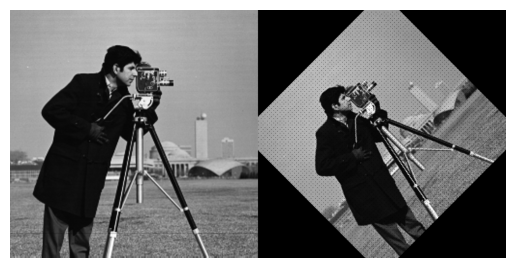

In [30]:
# แสดงผลเปรียบเทียบ
mul_img = cv2.hconcat([img, out])
ShowImage(mul_img)